<a href="https://colab.research.google.com/github/brunopiruka/neurocientista.com.br/blob/master/%5BS%C3%A3o_Francisco%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" src="http://neuropsicologia.com.br/logo.png">

#### **(Neuro)ciência de Dados**
*by [bruno_piruka](https://neuropsicologia.com.br)*

---

#**Análise dos Dados do Airbnb - São Francisco - CA**

##*A maior empresa hoteleira da atualidade não possui nenhum hotel!*

**Como isso é possível?**

O **[Airbnb](https://www.airbnb.com.br/)** conecta pessoas querendo hospedagem a outras querendo alugar seus imóveis, simples assim!

De forma inovadora e prática, na velocidade de alguns cliques.

Apesar das duras investidas sofridas por parte das grandes redes hoteleiras, ao final de 2018 duas conquistam marcam a história da Startup:

*   Quebrar a barreira dos **10 anos de vida**
*   Ultrapassar o número de **300 milhões** de pessoas hospedadas ao redor do mundo

O Airbnb disponibiliza seus dados, para algumas das principais cidades do mundo. Por meio do portal **[Inside Airbnb](http://insideairbnb.com/get-the-data.html)**, sendo possível baixar uma grande quantidade de dados e assim desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste *notebook*, iremos analisar os dados referentes à cidade de São Francisco, e ver quais insights podem ser extraídos a partir de dados brutos.**

##**Obtenção dos Dados**

Todos os dados utilizados na presente análise foram fornecidos pela Airbnb, através do site **[Inside Airbnb]('(http://insideairbnb.com/get-the-data.html')**.

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in **San Francisco** (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-francisco/2020-05-06/visualisations/listings.csv')

## **Análise dos Dados**

Esta etapa será a de conhecer os dados, compreender as variáveis presentes e formular questionamentos.


**Dicionário das variáveis**

* `id` - identificador numérico do anúncio
* `name` - descrição da hospedagem anunciada
* `host_id` - identificador numérico do proprietário (anfitrião)
* `host_name` - nome do proprietário (anfitrião)
* `neighbourhood_group` - ***coluna sem valores válidos***
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de acomodação oferecida
* `price` - preço anunciado pela diária da acomodação
* `minimum_nights`- quantidade mínima de noites por reseva
* `number_of_reviews`- quantidade de reviews que a propriedade possui
* `last_review`- data do último review
* `reviews_per_month`- quantidade de reviews por mês
* `calculated_host_listings_count`- quantidade de acomodações ofertadas pelo mesmo anfitrião
* `availability_365`- números de dias disponíveis dentro dos 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.83,1,118
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.83,1,0
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.15,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.12,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,714,5,28,2019-06-28,0.22,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo no identificação de nossos dados, iremos avaliar a quantidade de entradas e quais os tipos de cada coluna.

Lembrando que o *dataset* que está sendo trabalhado é uma versão "simplificada" - [`listing.csv`](http://data.insideairbnb.com/united-states/ca/san-francisco/2020-05-06/visualisations/listings.csv).

Caso queira consultar a versão completa, a mesma se encontra disponível como [`listings.csv.gz`](http://data.insideairbnb.com/united-states/ca/san-francisco/2020-05-06/data/listings.csv.gz).

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))


# verificar os tipos das variáveis do dataset
display(df.dtypes)


Entradas:	 8078
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma vez que a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, é importante avaliar a existência e relevância desses valores faltantes.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)



neighbourhood_group               1.000000
reviews_per_month                 0.235331
last_review                       0.235331
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para averiguar o tipo de distribuição das variáveis, iniciaremos plotando os respectivos histogramas.

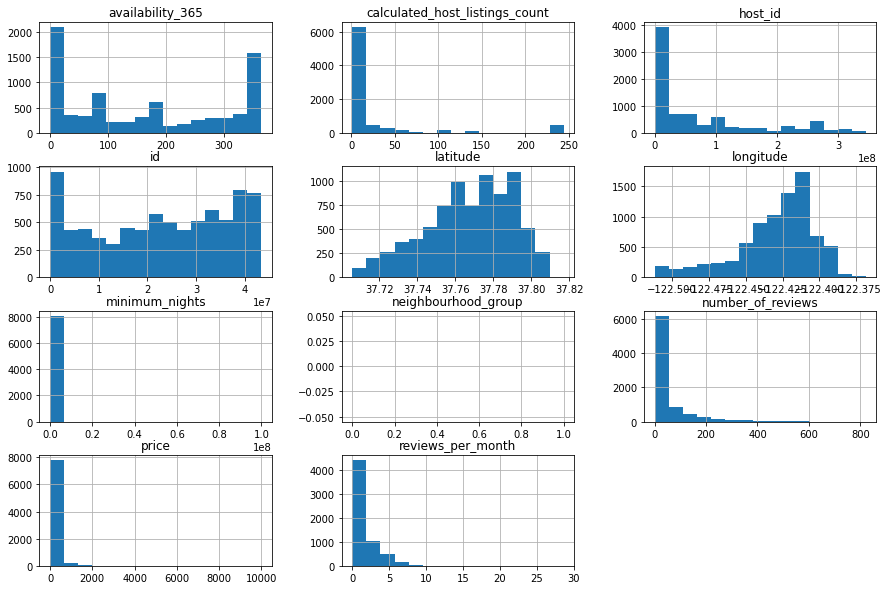

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Existem **outliers* nos dados?**
A distribuição nos histograma indicam a presença de *outliers*. Por exemplo, nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição esperada distorcendo, portanto, a representação gráfica. Há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

---



****Outliers*** são valores discrepantes que distorcem a análise estatística dos dados



In [7]:
# verificando o resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8078.000000,8.078000e+03,8078.000000,6177.000000,8078.00000,8078.00000
mean,231.394033,1.239714e+04,44.605595,1.514934,26.10671,164.57799
std,548.228690,1.112623e+06,81.530020,1.847408,59.44725,138.97311
min,0.000000,1.000000e+00,0.000000,0.010000,1.00000,0.00000
25%,95.000000,2.000000e+00,1.000000,0.240000,1.00000,21.00000
50%,150.000000,7.000000e+00,8.000000,0.770000,2.00000,148.00000
75%,230.000000,3.000000e+01,50.000000,2.170000,14.00000,311.00000
max,10000.000000,1.000000e+08,821.000000,28.660000,244.00000,365.00000


Com base no resumo estatístico, podemos confirmar nossas desconfianças:
* A variável `price`apresenta **75%** dos seus valores **abaixo de 230**, porém o valor **máximo é 10.000**.
* A variável `minimum_nights`apresenta **valores acima de 365**, provavelmente resultante de inclusões erradas.

Com isso, a média é "puxada" para longe da realidade.

#### Boxplot para a variável `minimum_nights`

minimum_nights: valores acima de 30:
341entradas
4.2213%


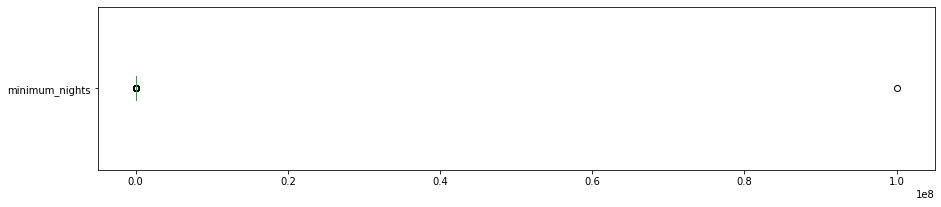

In [8]:
# plotando boxplot para a veriável minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show

# Visualizando valores acima de 30 dias para minimu_nights
print('minimum_nights: valores acima de 30:')
print('{}entradas'.format(len(df[df.minimum_nights>30])))
print('{:.4f}%'.format((len(df[df.minimum_nights>30])/df.shape[0])*100))

#### Boxplot para a variável `price`


price: valores acima de 750
232entradas
2.8720%


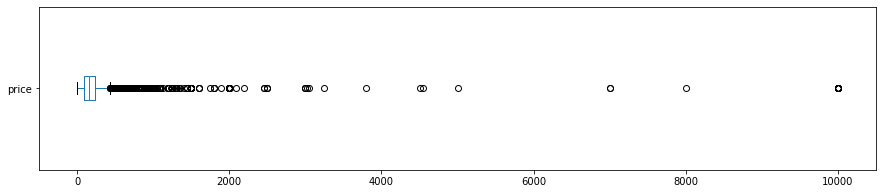

In [9]:
# plotando boxplot para a veriável price
df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show

# Visualizando valores acima de 750 para price
print('\nprice: valores acima de 750')
print('{}entradas'.format(len(df[df.price>750])))
print('{:.4f}%'.format((len(df[df.price>750])/df.shape[0])*100))

#### Histograma sem *outliers*

Uma vez identificados os *outliers*, para as variáveis `price` e `minimum_nights`, vamos eliminá-los e refazer os histogramas.

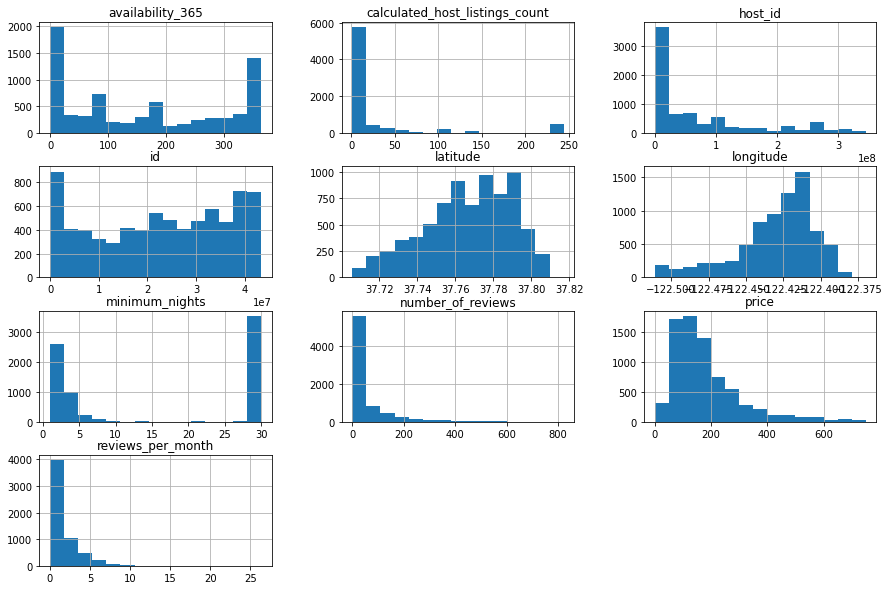

In [10]:
# removendo os outliers utilizando um novo data frame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>750].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

# removendo a coluna neighbourhood_group, uma vez que está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotando os novos histogramas já limpos
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Quanto esperar gastar em média com diárias em São Francisco

In [11]:
# Calculando a média da coluna `price`
print('Média das diária:', df_clean.price.mean())

Média das diária: 178.5389325169706


### **Q6. Qual a correlação existente entre as variáveis?**

Será que existe correlação entre as variáveis? Para essa análise buscaremos o fator de correlação, ou seja, o quanto uma variável está relacionada à outra, para isso faremos:
* Gerar um matriz de correlação
* Gerar um *heatmap* (mapa de calor) partindo dessa matriz, utilizando a biblioteca `seaborn`

In [12]:
# criando uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.173651,-0.106904,-0.163096,-0.023102,-0.116359
minimum_nights,-0.173651,1.000000,-0.355624,-0.419569,0.319568,0.319442
number_of_reviews,-0.106904,-0.355624,1.000000,0.746487,-0.211805,0.011891
reviews_per_month,-0.163096,-0.419569,0.746487,1.000000,-0.190669,-0.014489
calculated_host_listings_count,-0.023102,0.319568,-0.211805,-0.190669,1.000000,0.049819
availability_365,-0.116359,0.319442,0.011891,-0.014489,0.049819,1.000000


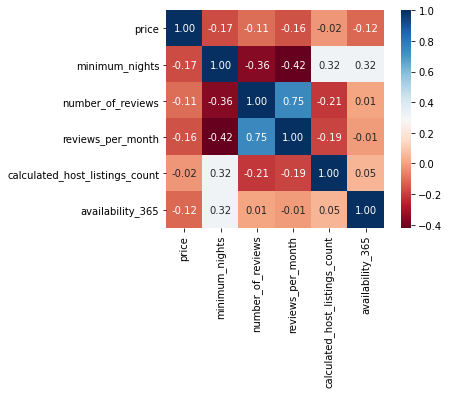

In [13]:
# plotando um heatmap (mapa de calor) a partir das correlações
sns.heatmap(corr, cmap='RdBu',fmt='.2f',square=True,linecolor='white',annot=True); 



### **Q7. Qual o tipo de acomodação mais ofertada no Airbnb?**

Analisando a coluna `room type`podemos descobrir qual a modalidade mais ofertada. Contanto as ocorrências para cada tipo, utilizando o método `value_counts()`

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4427
Private room       2736
Shared room         258
Hotel room           92
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]


Entire home/apt    0.589245
Private room       0.364169
Shared room        0.034340
Hotel room         0.012245
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de São Francisco?**

Para análisar os preços pela localização, iremos utilizar a função `groupby()`, agrupando e comparando por bairros *(neighbourhoods)*



In [16]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Marina                 237.808917
Presidio Heights       232.090909
Pacific Heights        229.401408
Russian Hill           226.966102
Castro/Upper Market    222.972362
Diamond Heights        222.666667
Twin Peaks             216.032258
Glen Park              215.854545
Potrero Hill           213.013043
Noe Valley             207.821549
Name: price, dtype: float64

In [17]:
# veirifcar a quantidade de acomodações por bairros
df_clean.neighbourhood.value_counts()

Mission                  671
Downtown/Civic Center    669
Western Addition         583
South of Market          580
Castro/Upper Market      398
Haight Ashbury           362
Bernal Heights           361
Nob Hill                 311
Noe Valley               297
Outer Sunset             294
Potrero Hill             230
Inner Richmond           209
North Beach              209
Bayview                  196
Financial District       185
Excelsior                182
Russian Hill             177
Marina                   157
Outer Richmond           154
Chinatown                154
Outer Mission            146
Inner Sunset             145
Pacific Heights          142
West of Twin Peaks       125
Parkside                 124
Ocean View               121
Visitacion Valley         63
Twin Peaks                62
Glen Park                 55
Lakeshore                 52
Crocker Amazon            45
Presidio Heights          22
Seacliff                  16
Diamond Heights           12
Golden Gate Pa

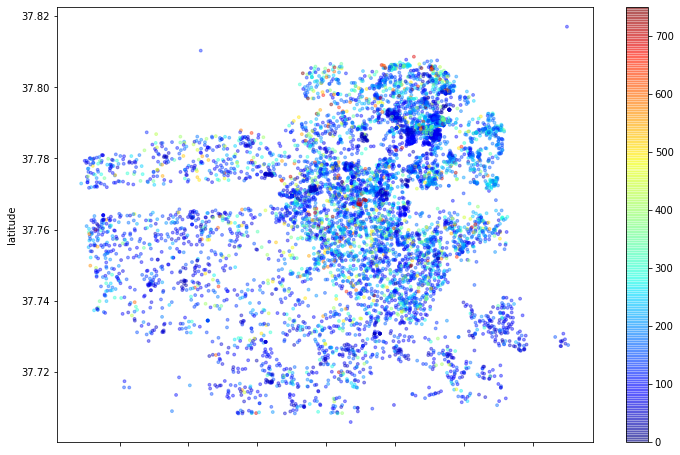

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,c=df_clean['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Uma última análise pode ser em relação à média do número mínimo de noites para aluguel

In [19]:
# ver a média da coluna `minimum_nights``
print("Média de mínimo de noites:", df_clean.minimum_nights.mean())

Média de mínimo de noites: 15.424996672434448


## Conclusões

Após uma análise superficial na base de dados do Airbnb, percebeu-se que existem *outliers* em algumas das variáveis. 

Também se notou que apesar de algumas localidades possuírem poucas acomodações ofertadas, aparentemente, não há distorção estatísticas dos atributos.

Por fim, lembramos que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.